In [1]:
import sklearn
import numpy as np
import pandas as pd

In [2]:
#import data
train = pd.read_csv('../../data/raw/Emergent_NAACL2016/emergent/url-versions-2015-06-14-clean-train.csv')
train.drop(columns=["Unnamed: 0"], inplace=True)

In [3]:
#create features
align_feature = pd.read_csv('../../data/processed/features/alignment_feature.csv')
cosine_feature = pd.read_csv('../../data/processed/features/cosine_feature.csv')
bow_feature = pd.read_csv('../../data/processed/features/headline_BoWBigram.csv')
qmark_feature = pd.read_csv('../../data/processed/features/headline_Qmark.csv')
neg_alignment_feature = pd.read_csv('../../data/processed/features/neg_alignment_feature.csv')
root_dist_feature = pd.read_csv('../../data/processed/features/root_dist_min.csv')
svo_feature = pd.read_csv('../../data/processed/features/svo_Lexical.csv')

In [4]:
#target_map = {"for": 0, "observing": 1, "against": 2}

In [5]:
#train = train.replace({"articleHeadlineStance": target_map})

In [6]:
train["articleHeadlineStance"].value_counts()#,test["articleHeadlineStance"].value_counts()

for          992
observing    775
against      304
Name: articleHeadlineStance, dtype: int64

In [7]:
train = pd.merge(train, align_feature, on="articleId")
train = pd.merge(train, cosine_feature, on="articleId")
train = pd.merge(train, bow_feature, on="articleId")
train = pd.merge(train, qmark_feature, on="articleId")
train = pd.merge(train, neg_alignment_feature, on="articleId")
train = pd.merge(train, root_dist_feature, on="articleId")
train = pd.merge(train, svo_feature, on="articleId")

In [8]:
#train["articleHeadlineStance"] = train["articleHeadlineStance"].astype("int")

In [9]:
# merge datasets and shuuffle with random seed
seed = 1234

train = sklearn.utils.shuffle(train, random_state=seed)
#test = sklearn.utils.shuffle(test, random_state=seed)


In [10]:
# create train and test

X_train = train.to_numpy()[:,5:]
Y_train = train["articleHeadlineStance"].values.reshape((-1,))

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)


#X_test = test.to_numpy()[:,5:]
#Y_test = test["articleHeadlineStance"].values.reshape((-1,))

In [24]:
Y_train = Y_Train
X_train = X_Train.astype(float)
X_val = X_Test.astype(float)
Y_val = Y_Test

In [21]:
from sklearn import preprocessing

In [22]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [15]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

Number of mislabeled points out of a total 415 points : 96
Accuracy on test set: 0.7686746987951807
[[0.61818182 0.18181818 0.2       ]
 [0.00497512 0.89552239 0.09950249]
 [0.01886792 0.32075472 0.66037736]]


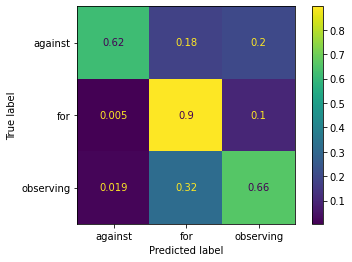

In [23]:
max_iter = 10e2
C=0.8
penalty='l1'

# Normal Train and Test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty=penalty, C=C, max_iter = max_iter, multi_class='auto', solver="liblinear")
soln = model.fit(X_train,Y_train)
ypred = soln.predict(X_val)

print("Number of mislabeled points out of a total %d points : %d" % (X_val.shape[0], (Y_val != ypred).sum()))
print("Accuracy on test set: "+str(model.score(X_val,Y_val)))
print(confusion_matrix(Y_val, ypred, normalize="true"))
plot_confusion_matrix(soln, X_val, Y_val, normalize="true")